In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
house_data = pd.read_csv('/content/HousePricingData.csv')

In [ ]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
house_data.shape

(4600, 18)

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
house_data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
house_data.bedrooms.unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8., 0.])

In [ ]:
house_data.bedrooms.value_counts()

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

In [ ]:
house_data.bathrooms.unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 0.  , 6.75])

In [ ]:
house_data.bathrooms.value_counts()

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64

In [ ]:
house_data = house_data[(house_data['bathrooms'] >= 1) & (house_data['bathrooms'] <= 4)]

In [ ]:
house_data.bathrooms.value_counts()

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.00      23
1.25       3
Name: count, dtype: int64

In [ ]:
house_data.waterfront.unique()

array([0, 1])

In [ ]:
summary_stats = house_data.describe()
summary_stats

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.502000e+03,4502.000000,4502.000000,4502.000000,4.502000e+03,4502.000000,4502.000000,4502.000000,4502.000000,4502.000000,4502.000000,4502.000000,4502.000000
mean,5.361418e+05,3.381830,2.121946,2091.379387,1.437440e+04,1.505331,0.005553,0.222790,3.452910,1791.250333,300.129054,1970.673478,810.706353
std,5.360551e+05,0.873037,0.701951,853.348847,3.501306e+04,0.536363,0.074320,0.746694,0.677095,794.664761,440.866646,29.660090,979.820489
min,0.000000e+00,1.000000,1.000000,520.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,520.000000,0.000000,1900.000000,0.000000
25%,3.211250e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1182.500000,0.000000,1951.000000,0.000000
50%,4.582000e+05,3.000000,2.250000,1960.000000,7.631500e+03,1.500000,0.000000,0.000000,3.000000,1580.000000,0.000000,1975.000000,0.000000
75%,6.460000e+05,4.000000,2.500000,2580.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,2260.000000,600.000000,1996.000000,1999.000000
max,2.659000e+07,8.000000,4.000000,7320.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,7320.000000,2850.000000,2014.000000,2014.000000


In [ ]:
missing_values = house_data.isnull().sum()
print(missing_values)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [ ]:
house_data.duplicated().sum()

0

In [ ]:
# Handling Outliers: Capping the price at 99th percentile
price_cap = house_data['price'].quantile(0.99)
house_data['price'] = np.where(house_data['price'] > price_cap, price_cap, house_data['price'])

In [ ]:
# Creating new features (example: total_sqft and age of the house)
house_data['total_sqft'] = house_data['sqft_living'] + house_data['sqft_lot']
house_data['age'] = 2024 - house_data['yr_built']

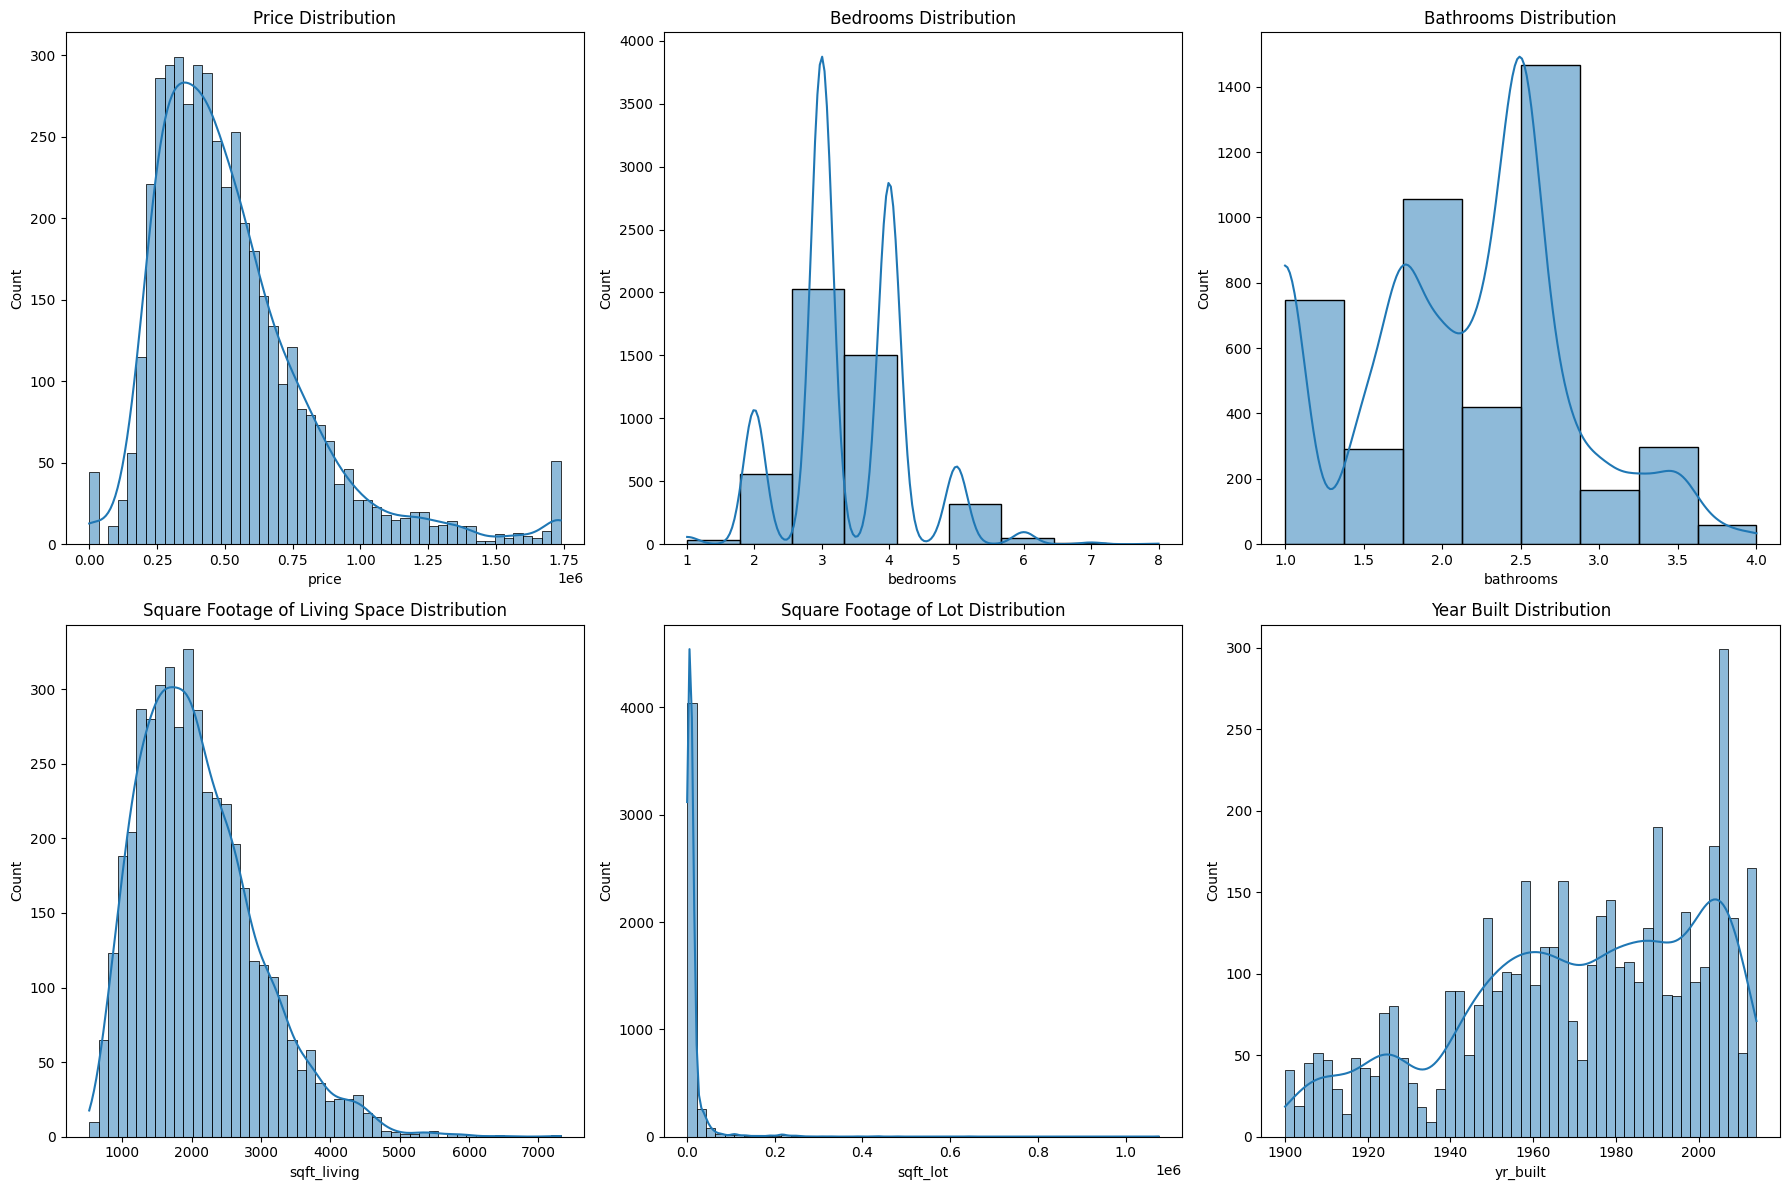

In [ ]:
# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.histplot(house_data['price'], bins=50, kde=True, ax=axes[0, 0]).set_title('Price Distribution')
sns.histplot(house_data['bedrooms'], bins=9, kde=True, ax=axes[0, 1]).set_title('Bedrooms Distribution')
sns.histplot(house_data['bathrooms'], bins=8, kde=True, ax=axes[0, 2]).set_title('Bathrooms Distribution')
sns.histplot(house_data['sqft_living'], bins=50, kde=True, ax=axes[1, 0]).set_title('Square Footage of Living Space Distribution')
sns.histplot(house_data['sqft_lot'], bins=50, kde=True, ax=axes[1, 1]).set_title('Square Footage of Lot Distribution')
sns.histplot(house_data['yr_built'], bins=50, kde=True, ax=axes[1, 2]).set_title('Year Built Distribution')
plt.tight_layout()
plt.show()

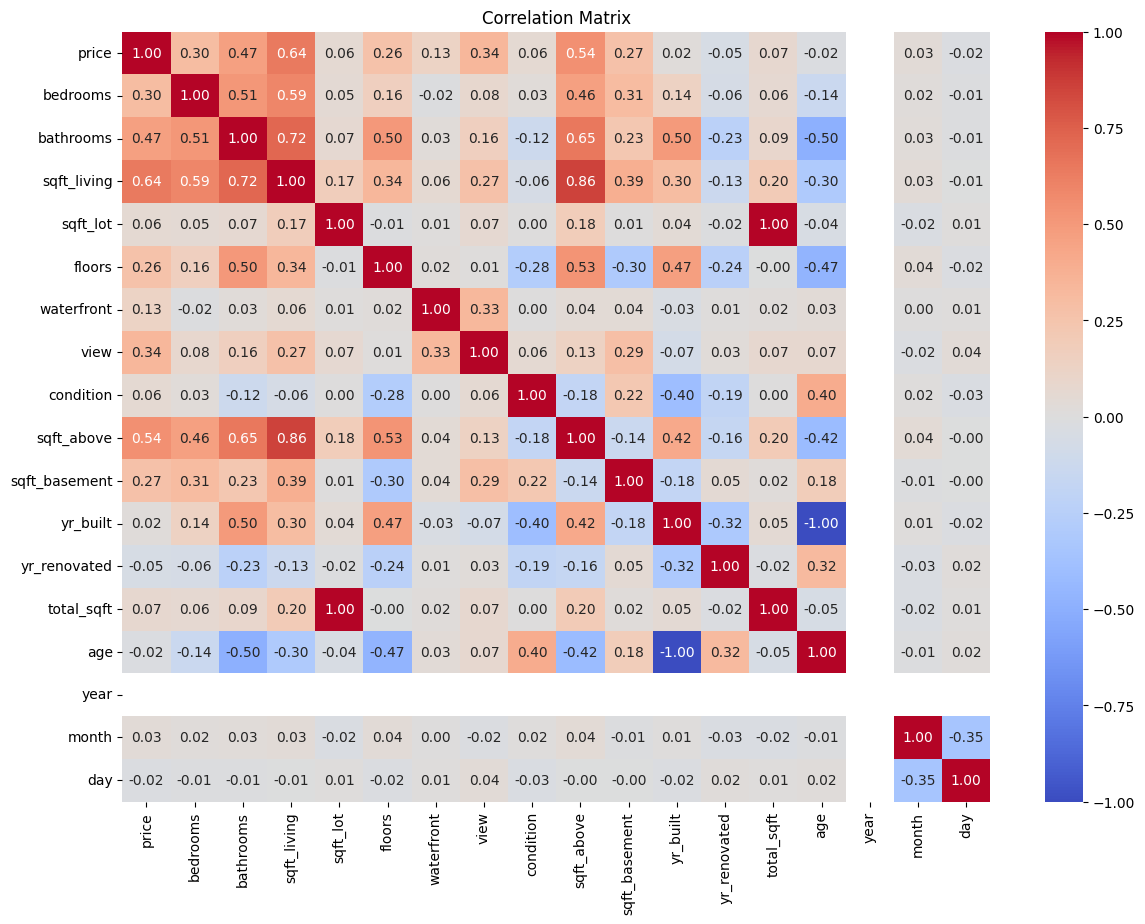

In [ ]:
# Convert the 'date' column to datetime objects
house_data['date'] = pd.to_datetime(house_data['date'])

# Extract numerical features from the date
house_data['year'] = house_data['date'].dt.year
house_data['month'] = house_data['date'].dt.month
house_data['day'] = house_data['date'].dt.day

# Select only numerical columns for correlation
numerical_data = house_data.select_dtypes(include=['number'])

# Now compute the correlation matrix
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Data Preparation
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'total_sqft', 'age']
X = house_data[features]
y = house_data['price']

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression with Cross-Validation
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X_train, y_train, cv=10, scoring='r2')
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Calculate MSE and R² score for Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression Cross-Validation R²: {lin_scores.mean()}")
print(f"Linear Regression Test MSE: {mse_lin}")
print(f"Linear Regression Test R²: {r2_lin}")

Linear Regression Cross-Validation R²: 0.49690459211065996
Linear Regression Test MSE: 47683329042.39999
Linear Regression Test R²: 0.4858315205182995


In [ ]:
# Polynomial Regression (degree 2) with Ridge Regularization
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

ridge_reg = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_reg, X_train_poly, y_train, cv=10, scoring='r2')
ridge_reg.fit(X_train_poly, y_train)
y_pred_ridge = ridge_reg.predict(X_test_poly)

# Calculate MSE and R² score for Polynomial Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Cross-Validation R²: {ridge_scores.mean()}")
print(f"Ridge Regression Test MSE: {mse_ridge}")
print(f"Ridge Regression Test R²: {r2_ridge}")

Ridge Regression Cross-Validation R²: 0.4320429347255059
Ridge Regression Test MSE: 46117636328.38061
Ridge Regression Test R²: 0.5027143568946584


In [ ]:
# Polynomial Regression (degree 2) with Lasso Regularization
lasso_reg = Lasso(alpha=0.01)
lasso_scores = cross_val_score(lasso_reg, X_train_poly, y_train, cv=10, scoring='r2')
lasso_reg.fit(X_train_poly, y_train)
y_pred_lasso = lasso_reg.predict(X_test_poly)

# Calculate MSE and R² score for Polynomial Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Cross-Validation R²: {lasso_scores.mean()}")
print(f"Lasso Regression Test MSE: {mse_lasso}")
print(f"Lasso Regression Test R²: {r2_lasso}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.508e+13, tolerance: 2.776e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.368e+13, tolerance: 2.809e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.483e+13, tolerance: 2.797e

Lasso Regression Cross-Validation R²: 0.4316777717854009
Lasso Regression Test MSE: 46118017616.00938
Lasso Regression Test R²: 0.5027102454770148


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.018e+13, tolerance: 3.085e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import ElasticNet

# Define the ElasticNet model
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Perform cross-validation and calculate the mean R² score
elastic_net_scores = cross_val_score(elastic_net_reg, X_train_poly, y_train, cv=10, scoring='r2')
print(f"ElasticNet Regression Cross-Validation R²: {elastic_net_scores.mean()}")

# Fit the model on the training data
elastic_net_reg.fit(X_train_poly, y_train)

# Predict on the test data
y_pred_elastic_net = elastic_net_reg.predict(X_test_poly)

# Calculate the MSE and R² score for the predictions
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print(f"ElasticNet Regression Test MSE: {mse_elastic_net}")
print(f"ElasticNet Regression Test R²: {r2_elastic_net}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.860e+13, tolerance: 2.776e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.864e+13, tolerance: 2.809e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.784e+13, tolerance: 2.797e

ElasticNet Regression Cross-Validation R²: 0.4523656798146865
ElasticNet Regression Test MSE: 46413288615.93892
ElasticNet Regression Test R²: 0.49952634359521


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.471e+13, tolerance: 3.085e+10
  model = cd_fast.enet_coordinate_descent(


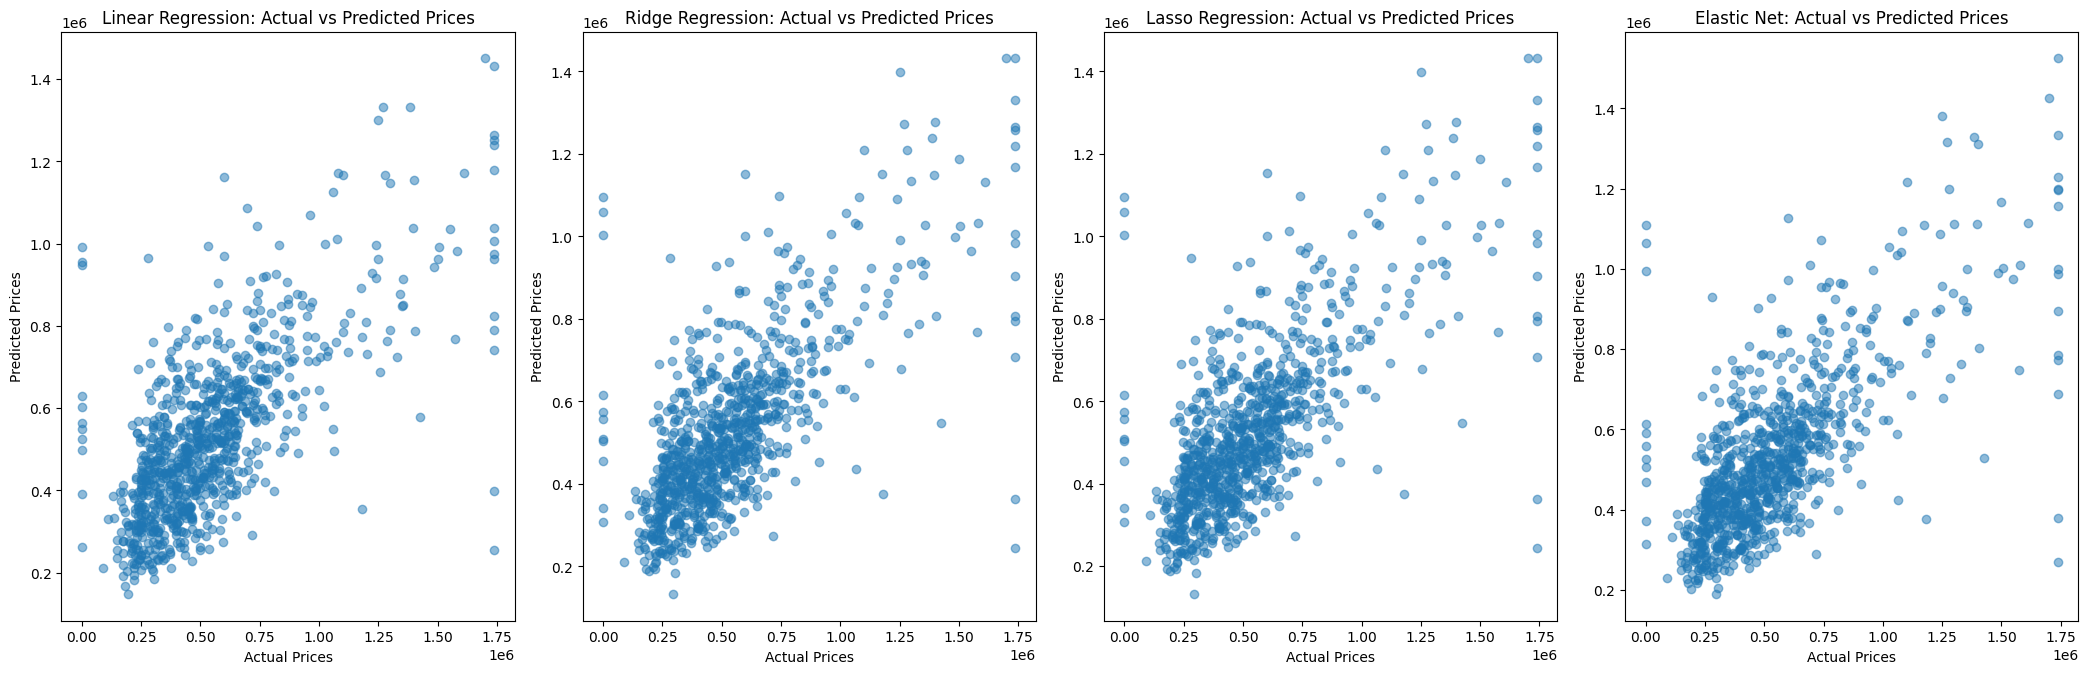

In [ ]:
# Visualization of Predictions vs Actuals
plt.figure(figsize=(21, 7))

plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices")

plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge Regression: Actual vs Predicted Prices")

plt.subplot(1, 4, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression: Actual vs Predicted Prices")

plt.subplot(1, 4, 4)
plt.scatter(y_test, y_pred_elastic_net, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Elastic Net: Actual vs Predicted Prices")

plt.tight_layout()
plt.show()